# To perform simple linear regression when having multiple inputs, find the variables that affects the target variable the most(Use correlation for this) or (Use pairplots) or (Use heatmap)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Deloitte Folder/ML/Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Finding Correlation between each variable and sales to find out what affects the sales the most

In [4]:
np.corrcoef(data[['TV','Sales']]) # np.corrcoef gives the correlation matrix

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [11]:
np.corrcoef(data[['Radio','Sales']])

C:\Users\gauravn\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\gauravn\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([[ 1.,  1.,  1., ..., -1.,  1., -1.],
       [ 1.,  1.,  1., ..., -1.,  1., -1.],
       [ 1.,  1.,  1., ..., -1.,  1., -1.],
       ...,
       [-1., -1., -1., ...,  1., -1.,  1.],
       [ 1.,  1.,  1., ..., -1.,  1., -1.],
       [-1., -1., -1., ...,  1., -1.,  1.]])

In [12]:
np.corrcoef(data[['Newspaper','Sales']])

array([[ 1.,  1.,  1., ..., -1.,  1., -1.],
       [ 1.,  1.,  1., ..., -1.,  1., -1.],
       [ 1.,  1.,  1., ..., -1.,  1., -1.],
       ...,
       [-1., -1., -1., ...,  1., -1.,  1.],
       [ 1.,  1.,  1., ..., -1.,  1., -1.],
       [-1., -1., -1., ...,  1., -1.,  1.]])

### Or use pairplot  to find the correlation

C:\Users\gauravn\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


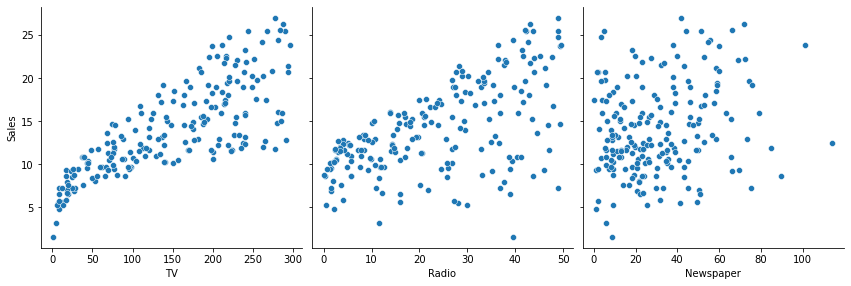

In [5]:
sns.pairplot(data,x_vars = ['TV','Radio','Newspaper'], y_vars = ['Sales'],size=4,kind='scatter')

### Or use heatmap to find correlation

<AxesSubplot:>

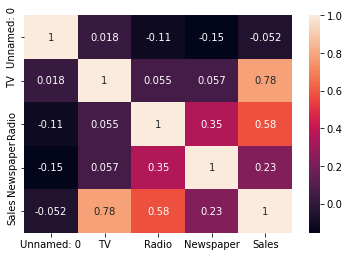

In [6]:
sns.heatmap(data.corr(),annot = True)

In [7]:
x = data.iloc[:,1:2].values
y= data.iloc[:,-1].values

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train) # training the model

LinearRegression()

In [34]:
y_pred = regressor.predict(x_test)

Text(0.5, 1.0, 'Sales vs Tv(training)')

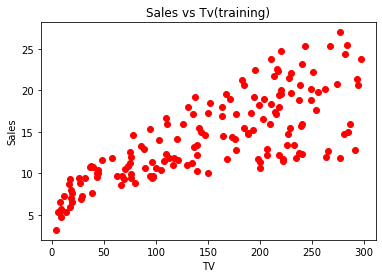

In [35]:
plt.scatter(x_train,y_train,color='red')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Sales vs Tv(training)')

Text(0.5, 1.0, 'Sales vs Tv(training)')

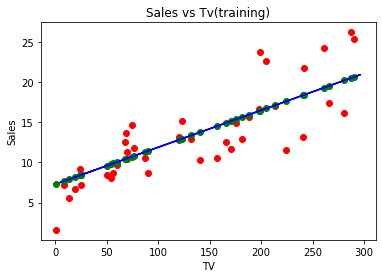

In [36]:
plt.scatter(x_test,y_test,color='red')
plt.scatter(x_test,y_pred,color='green')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Sales vs Tv(training)')

In [37]:
print(regressor.predict([[400]]))

[25.69560961]


In [38]:
print(regressor.coef_)
print(regressor.intercept_)

[0.04600779]
7.292493773559364


In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print('r-squared:',r2_score(y_test,y_pred))

3.191579849311344
r-squared: 0.6763151577939721


## OLS(Ordinary least square)  method for linear regression

In [41]:
import statsmodels.api as sm
x_train_sm=sm.add_constant(x_train) # add a constant to get intercept
lr=sm.OLS(y_train,x_train_sm).fit()# fit the regression line using OLS

In [42]:
lr.params

array([7.29249377, 0.04600779])

In [43]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     225.9
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           2.83e-32
Time:                        14:13:16   Log-Likelihood:                -416.03
No. Observations:                 160   AIC:                             836.1
Df Residuals:                     158   BIC:                             842.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2925      0.529     13.795      0.0